In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from radar import radar2, norm_df, radar
import pandas as pd

In [2]:
data = pd.read_hdf('combined_maf_dataframe.hdf')

In [3]:
data.columns

Index(['runName', 'version', 'parallax_best18k', 'properMotion_best18k',
       'fO_fONv MedianNvis', 'fO_fOArea', 'median_coadd_u', 'median_coadd_g',
       'median_coadd_r', 'median_coadd_i', 'median_coadd_z', 'median_coadd_y',
       'SNIa_PrePeak_Mean', 'Fast Microlensing_Mean', 'Slow Microlensing_Mean',
       'KN_PrePeak_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
       'TDEsPopMetric__some_color_Mean', 'TDEsPopMetric__some_color_pu_Mean',
       'WeakLensingNvisits fiveSigmaDepth, visitExposureTime%_Median',
       'Nstars_no_crowding_Total N Stars, no crowding',
       'ExgalM5_with_cuts_3x2ptFoM', 'DD:ELAISS1,u', 'DD:XMM-LSS,u',
       'DD:ECDFS,u', 'DD:COSMOS,u', 'DD:EDFS,u', 'DD:EDFSa,u', 'DD:EDFSb,u',
       'DD:ELAISS1,g', 'DD:XMM-LSS,g', 'DD:ECDFS,g', 'DD:COSMOS,g',
       'DD:EDFS,g', 'DD:EDFSa,g', 'DD:EDFSb,g', 'DD:ELAISS1,r', 'DD:XMM-LSS,r',
       'DD:ECDFS,r', 'DD:COSMOS,r', 'DD:EDFS,r', 'DD:EDFSa,r', 'DD:EDFSb,r',
       'DD:ELAISS1,i', 'DD:XMM-LSS,i', '

In [4]:
cols = ['runName', 'parallax_best18k', 'properMotion_best18k', 'fO_fONv MedianNvis',
        'SNIa_PrePeak_Mean',
        'TDEsPopMetric__some_color_pu_Mean',
        'WeakLensingNvisits fiveSigmaDepth, visitExposureTime%_Median',
        'ExgalM5_with_cuts_3x2ptFoM',
        'Fast Microlensing_Mean', 'GalaxyCountsMetric_extended_N Galaxies (all)',
        'Nstars_no_crowding_Total N Stars, no crowding',
       'NEO bright', 'NEO faint', 'TNO']#,
#        '3 pairs in 15 nights detection loss NEO H=16.0',
#        '3 pairs in 30 nights detection loss NEO H=22.0',
#       '3 pairs in 15 nights detection loss TNO H=4.0']

linear_cols = []#['SNIa_PrePeak_Mean',
           #'TDEsPopMetric__some_color_pu_Mean',
           #'Fast Microlensing_Mean',
           #'3 pairs in 15 nights detection loss NEO H=16.0',
           #'3 pairs in 30 nights detection loss NEO H=22.0',
           #'3 pairs in 15 nights detection loss TNO H=4.0']

mag_cols = ['runName', 'median_coadd_u', 'median_coadd_g',
           'median_coadd_r', 'median_coadd_i',
            'median_coadd_z', 'median_coadd_y']


name_mapper = {'runName': 'runName', 'parallax_best18k': 'Parallax', 'properMotion_best18k': 'Proper Motion',
       'fO_fONv MedianNvis': 'fO N', 'SNIa_PrePeak_Mean': 'SNeIa', 'Fast Microlensing_Mean': 'Fast Micro L',
       'Slow Microlensing_Mean': 'Slow Micro L',
        'TDEsPopMetric__some_color_Mean': 'TDE',
               'TDEsPopMetric__some_color_pu_Mean':'TDE',
               'WeakLensingNvisits fiveSigmaDepth, visitExposureTime%_Median': 'WL',
               'ExgalM5_with_cuts_3x2ptFoM': '3x2FoM',
       'GalaxyCountsMetric_extended_N Galaxies (all)': 'N Gals',
       'Nstars_no_crowding_Total N Stars, no crowding': 'N Stars',
       '3 pairs in 15 nights detection loss NEO H=16.0': 'NEO, bright',
               '3 pairs in 30 nights detection loss NEO H=22.0':'NEO, faint',
        '3 pairs in 15 nights detection loss TNO H=6.0':' TNO',
              'NEO bright': 'NEO, bright', 'NEO faint': 'NEO, faint',
              'TNO': 'TNO'}

mag_name_mapper = {'runName': 'runName', 'median_coadd_u': 'u', 'median_coadd_g': 'g',
       'median_coadd_r': 'r', 'median_coadd_i': 'i', 'median_coadd_z': 'z', 'median_coadd_y': 'y'}

In [5]:
data


,runName,version,parallax_best18k,properMotion_best18k,fO_fONv MedianNvis,fO_fOArea,median_coadd_u,median_coadd_g,median_coadd_r,median_coadd_i,...,"DD:ELAISS1,y","DD:XMM-LSS,y","DD:ECDFS,y","DD:COSMOS,y","DD:EDFS,y","DD:EDFSa,y","DD:EDFSb,y",NEO bright,NEO faint,TNO
0,baseline_nexp2,1.7.1,0.785917,0.171124,888.0,17992.777166,25.732411,26.864525,26.875705,26.339577,...,26.781206,26.663900,26.642860,26.621123,24.884597,26.520193,26.495884,0.9102,0.3942,0.6402
1,pause2_pl183,1.7.1,0.791480,0.168643,890.0,18000.330809,25.723656,26.858958,26.875097,26.332104,...,26.732082,26.668185,26.665843,26.645226,24.894928,26.501721,26.487413,0.9152,0.3970,0.6406
2,pause2_pl91,1.7.1,0.786681,0.169547,890.0,18035.581142,25.726775,26.863456,26.880990,26.342999,...,26.766478,26.675394,26.646621,26.609352,24.880743,26.529135,26.501355,0.9120,0.3998,0.6400
3,pause3,1.7.1,0.787903,0.167205,895.0,18048.170547,25.741652,26.863425,26.885228,26.344653,...,26.738812,26.654105,26.682797,26.663395,24.877380,26.511046,26.483287,0.9132,0.4008,0.6428


In [6]:
runs = ['baseline_nexp2'] + [name for name in data['runName'].values if 'pause' in name]
runs

# Let's rename them a bit
run2run = {'baseline_nexp2': 'baseline_nexp2', 'pause2_pl183': 'pause 183d', 'pause2_pl91': 'pause 91d',
          'pause3': 'pause 61dx3', 'pause_sim': 'naive pause'}

runs = [run2run[run] for run in runs]




In [7]:
for i in range(4):
    data['runName'][i] = runs[i]
data

<ipython-input-7-912da00baec2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['runName'][i] = runs[i]


,runName,version,parallax_best18k,properMotion_best18k,fO_fONv MedianNvis,fO_fOArea,median_coadd_u,median_coadd_g,median_coadd_r,median_coadd_i,...,"DD:ELAISS1,y","DD:XMM-LSS,y","DD:ECDFS,y","DD:COSMOS,y","DD:EDFS,y","DD:EDFSa,y","DD:EDFSb,y",NEO bright,NEO faint,TNO
0,baseline_nexp2,1.7.1,0.785917,0.171124,888.0,17992.777166,25.732411,26.864525,26.875705,26.339577,...,26.781206,26.663900,26.642860,26.621123,24.884597,26.520193,26.495884,0.9102,0.3942,0.6402
1,pause 183d,1.7.1,0.791480,0.168643,890.0,18000.330809,25.723656,26.858958,26.875097,26.332104,...,26.732082,26.668185,26.665843,26.645226,24.894928,26.501721,26.487413,0.9152,0.3970,0.6406
2,pause 91d,1.7.1,0.786681,0.169547,890.0,18035.581142,25.726775,26.863456,26.880990,26.342999,...,26.766478,26.675394,26.646621,26.609352,24.880743,26.529135,26.501355,0.9120,0.3998,0.6400
3,pause 61dx3,1.7.1,0.787903,0.167205,895.0,18048.170547,25.741652,26.863425,26.885228,26.344653,...,26.738812,26.654105,26.682797,26.663395,24.877380,26.511046,26.483287,0.9132,0.4008,0.6428


In [17]:
data['SNIa_PrePeak_Mean']

0    0.1520
1    0.1375
2    0.1525
3    0.1450
Name: SNIa_PrePeak_Mean, dtype: float64

In [8]:
data_normed = norm_df(data, runs, cols, mag_cols=linear_cols,
                      invert_cols=['parallax_best18k', 'properMotion_best18k'], norm_run='baseline_nexp2')
data_normed = data_normed.rename(columns=name_mapper)

In [9]:
runs

['baseline_nexp2', 'pause 183d', 'pause 91d', 'pause 61dx3']

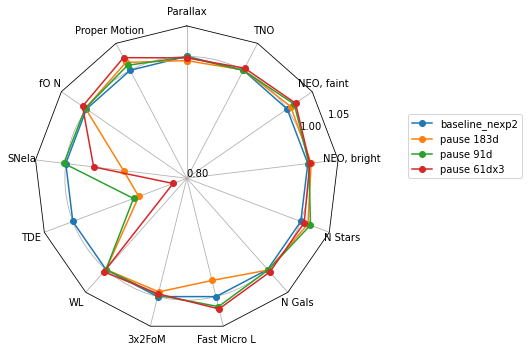

In [10]:
fig, ax = radar(data_normed, legend=True, rgrids=[0.80, 1.0, 1.05])
fig.tight_layout()
fig.savefig('pause_radar.pdf')

In [11]:
data_normed

,runName,Parallax,Proper Motion,fO N,SNeIa,TDE,WL,3x2FoM,Fast Micro L,N Gals,N Stars,"NEO, bright","NEO, faint",TNO
0,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,pause 183d,0.992971,1.014714,1.002252,0.904605,0.884259,1.000000,0.991966,0.972710,1.001140,1.012525,1.005493,1.007103,1.000625
2,pause 91d,0.999029,1.009299,1.002252,1.003289,0.893519,1.000000,0.997409,1.016894,1.001151,1.016966,1.001978,1.014206,0.999688
3,pause 61dx3,0.997480,1.023438,1.007883,0.953947,0.824074,1.005128,0.995284,1.020793,1.005463,1.005988,1.003296,1.016743,1.004061


U-band throughputs now all the same for all sims.

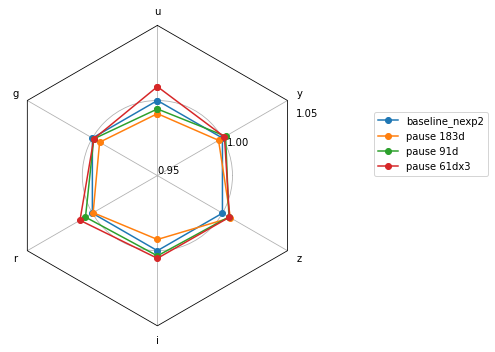

In [12]:
data_normed = norm_df(data, runs, mag_cols, norm_run='baseline_nexp2',
                      invert_cols=None, mag_cols='all')
data_normed = data_normed.rename(columns=mag_name_mapper)

fig, ax = radar(data_normed, legend=True, rgrids=[.95, 1.0, 1.05], alpha=.1)
fig.tight_layout()

In [13]:
data_normed

,runName,u,g,r,i,z,y
0,baseline_nexp2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,pause 183d,0.991246,0.994433,0.999392,0.992528,1.006131,0.997001
2,pause 91d,0.994365,0.998931,1.005285,1.003422,1.004983,1.002430
3,pause 61dx3,1.009241,0.998900,1.009523,1.005077,1.005397,1.001552


Quick hits looking at what happens if we pause the survey for 6 months, then resume:

Note:  pause_sim is the first attempt where the footprint object didn't know there was a pause, so it pushed to higher airmass to try and recover.  The run pasue2_pl91 is a 91 day pause after 2 years, and pause2_pl183 is a 183 day pause after 2 years (both using a smarter footprint so it "knows" it will have time to recover after year 10).

Pretty much as expected, the SNe and TDE transients suffer because of the interupted observing season. Proper motions see a slight boost because of the longer baseline of observations for part of the sky. Faint NEOs get 1-2% better in the paused sims. Because NEOs can have orbits similar to earth, a longer survey means more NEOs can become visible.

The pause3 run is 3 61-day pauses. That does a little to mitigate the impact on SNe, but hurts TDEs more. So lots of trade-offs.

If there needs to be a pause, a single 91-day pause looks like the clear winner with the lowest impact and nearly identical benefit compared to the other plans.